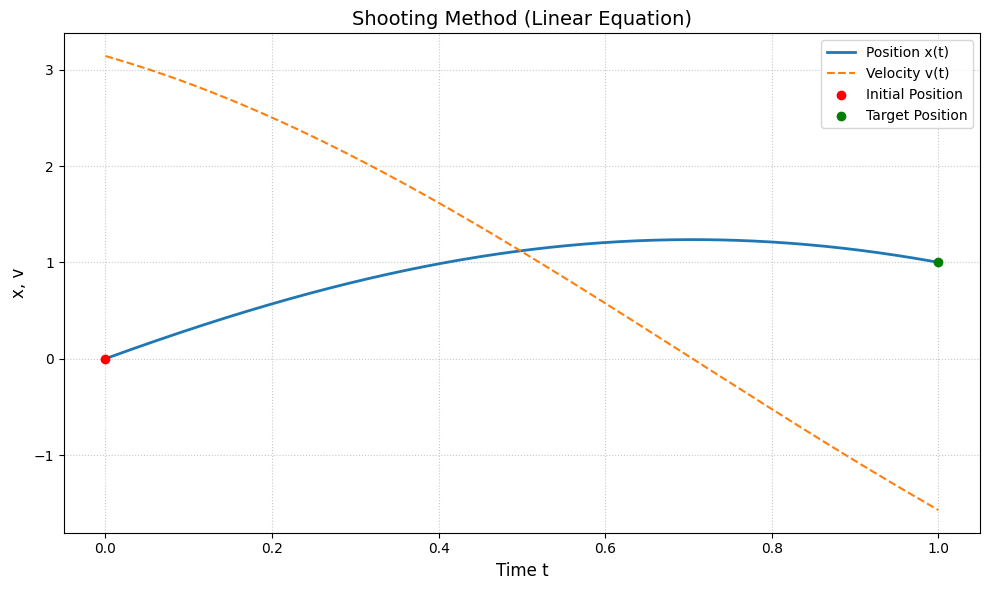

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    """定义二阶微分方程右侧函数（相当于加速度函数）
    方程形式：x'' = -π²/4 * (x + 1)

    参数:
        x -- 当前位置值

    返回:
        加速度值（对应二阶导数）
    """
    return -np.pi**2 / 4 * (x + 1)

def rk4(f, initial_x, initial_v, num_steps, interval_length):
    """四阶龙格-库塔法求解二阶微分方程（边值问题转化为初值问题）
    
    参数:
        f -- 加速度函数（二阶导函数）
        initial_x -- 初始位置 x(0)
        initial_v -- 初始速度猜测值
        num_steps -- 离散化步数（决定计算精度）
        interval_length -- 时间区间长度（t ∈ [0, L]）
    
    返回:
        t -- 时间序列数组
        x -- 位置序列数组
        v -- 速度序列数组
    """
    h = interval_length / num_steps  # 计算时间步长
    # 初始化存储数组
    t = np.zeros(num_steps + 1)      # 时间数组，从0开始
    x = np.zeros(num_steps + 1)      # 位置数组
    v = np.zeros(num_steps + 1)      # 速度数组

    # 设置初始条件
    t[0] = 0.0
    x[0] = initial_x
    v[0] = initial_v

    # 四阶龙格-库塔法主循环
    for i in range(num_steps):
        # 计算四个斜率（k对应位置的导数，l对应速度的导数）
        k1 = h * v[i]                # 位置的一阶近似
        l1 = h * f(x[i])             # 速度的一阶近似（即加速度）

        k2 = h * (v[i] + l1 / 2)     # 使用中间速度更新位置
        l2 = h * f(x[i] + k1 / 2)    # 使用中间位置计算加速度

        k3 = h * (v[i] + l2 / 2)     # 改进后的中间位置
        l3 = h * f(x[i] + k2 / 2)    # 改进后的中间加速度

        k4 = h * (v[i] + l3)         # 最终位置步长
        l4 = h * f(x[i] + k3)       # 最终加速度步长

        # 加权平均更新状态量
        x[i + 1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        v[i + 1] = v[i] + (l1 + 2*l2 + 2*l3 + l4) / 6
        t[i + 1] = t[i] + h

    return t, x, v

# ================== 全局参数设置 ==================
initial_position = 0.0  # 初始位置 x(0) = 0
target_position = 1.0   # 目标位置 x(1) = 1（边值条件）
num_steps = 1000        # 离散化步数（影响计算精度）
interval_length = 1.0   # 时间区间长度 t ∈ [0, 1]
v_guess1 = 1.0          # 第一次速度猜测值
v_guess2 = 2.0          # 第二次速度猜测值

# 执行两次不同初值的RK4计算
t1, x1, v1 = rk4(func, initial_position, v_guess1, num_steps, interval_length)
t2, x2, v2 = rk4(func, initial_position, v_guess2, num_steps, interval_length)

# 利用解的线性性质构造满足边值条件的解
# 根据叠加原理：x = a*x1 + b*x2，且a + b = 1
a = (x2[-1] - target_position) / (x2[-1] - x1[-1])  # 计算混合系数a
b = (x1[-1] - target_position) / (x1[-1] - x2[-1])  # 计算混合系数b
x = a * x1 + b * x2  # 构造满足x(1)=1的解
v = a * v1 + b * v2  # 对应的速度场

# ================== 结果可视化 ==================
plt.figure(figsize=(10, 6))
plt.plot(t1, x, label="Position x(t)", linewidth=2)
plt.plot(t1, v, label="Velocity v(t)", linestyle="--")

# 标记关键点
plt.scatter(0, initial_position, c="red", zorder=5, label="Initial Position")
plt.scatter(interval_length, target_position, c="green", zorder=5, label="Target Position")

# 图表装饰
plt.xlabel("Time t", fontsize=12)
plt.ylabel("x, v", fontsize=12)
plt.title("Shooting Method (Linear Equation)", fontsize=14)
plt.grid(True, linestyle=":", alpha=0.7)  # 添加网格线
plt.legend(loc='upper right')             # 显示图例
plt.tight_layout()                       # 自动调整布局
plt.show()